#Introduction to Python: Variables & Functions

More and more scientists and researchers are [relying](http://www.software.ac.uk/blog/2014-12-04-its-impossible-conduct-research-without-software-say-7-out-10-uk-researchers) on software to do their research - and we custom-make much of that software ourselves. And yet, most undergraduate curriculum contains little or no training in programming; this has created a lot of stress among new researchers, as they enter their careers without the skills they need. In this lesson, we'll introduce Python, a popular language for programming in the sciences, in a way designed for folks who have never programmed at all before.

###Thanks
Much of this lesson is based on [Software Carpentry](https://software-carpentry.org/), a workshop targeting the same skills and audience. If you'd like a Software Carpentry workshop in your community, get in touch with them through their website, or with me [on twitter via @billdoesphysics](https://twitter.com/billdoesphysics).

##Installation

If you'd like to run this notebook yourself, the easiest way forward is to install Python 3.4 through [Anaconda](https://www.continuum.io/downloads). Anaconda will install Python, and a collection of Python tools (we call them 'packages') that are most popular in scientific programming. When asked, choose the free option of the Python 3.4 installer, and follow the instructions they provide.

Once that's installed, you can open your own notebook editor by typing `ipython notebook` at the command line or termianl prompt.

#Part 0: A Quick Demo

I'm going to start off with a short demo and discussion of just a little of what Python can do, and why programming is so useful in science. Don't worry if you don't understand the code at this point - we'll be covering all the details later. If you want to run this demo yourself, you'll need the extra package `wodpy` - see the installation instructions [here](https://github.com/IQuOD/wodpy#install), or don't worry about it and start executing code yourself in the next section.

Here's some data I was working with recently:

```
C41303567064US5112031934 8 744210374426193562-17227140 6110101201013011182205814
01118220291601118220291901024721 8STOCS85A3 41032151032165-500632175-50023218273
18117709500110134401427143303931722076210220602291107291110329977020133023846181
24421800132207614110217330103192220521322011216442103723077095001101818115508527
20012110000133312500021011060022022068002272214830228442684000230770421200000191
15507911800121100001333125000151105002103302270022022068002274411816302284426840
00230770426500000191155069459001211000013331250001511050021033011300220220680022
73319043022844268400023077042620000019116601596680012110000133312500021022016002
17110100220220680022733112830228442684000230770435700000181155088803001211000013
33125000210220160022022068002273311283022844268400023077042120000019115508880300
12110000133312500015110200210330535002202206800227441428030228442684000230770421
20000019115508880300121100001333125000152204300210220320022022068002273312563022
84426840002307704212000001911550853710012110000133312500015110200210220160022022
06800227331128302284426840002307704212000001100003328960044230900033267500222650
03312050033281000220100033289500442309000332670002227100331123003328100022025002
22900044231910033286200222900033115400332810002205000342-12300442324100332728003
32117003312560033280500   
```

This is World Ocean Database data, and anyone working in ocean science will have to be able to read this. If it's a bit hard to understand, there's a [172 page PDF](http://data.nodc.noaa.gov/woa/WOD/DOC/wodreadme.pdf) you can read to decode it. If this does not sound like fun, don't worry - Python to the rescue! I can read this data much more easily with the following piece of code:

In [10]:
from wodpy import wod
import pandas

myFile = open("data/wod-example.dat")
profile = wod.WodProfile(myFile)
profile.df()

,depth,depth_qc,salinity,salinity_qc_flag,temperature,temperature_qc_flag
0,0,0,30.90,0,8.96,0
1,10,0,30.90,0,8.95,0
2,25,0,31.91,0,0.90,0
3,50,0,32.41,0,-1.23,0


In only five lines of Python, we've turned our data into something we can understand a little bit of. Let's keep going:  

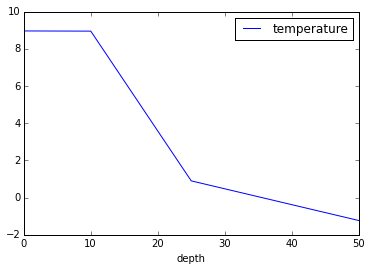

In [9]:
%matplotlib inline
pandas.DataFrame.plot(profile.df(), x='depth', y='temperature')

A lovely plot of our data that was completely unreadable only seven lines ago. Even though we don't understand the code yet (and that's ok!) we can observe a couple of things about it:

 - How exactly did Python know how to read that block of numbers we started with? We used the `wodpy` tool, which is another piece of Python code that some nice person on the internet wrote and shared with us. Python has a vibrant community of **software sharing and reuse**, that allows us to get useful code without having to reinvent it ourselves. When you write Python, you're never coding alone.
 - By doing our work in code, we've *necessarily* written down every step we took to transform our raw data into our results - **exactly like we do in a traditional lab book**. But as code, our methodology is always precicely defined, and re-runnable any time we like.

#Part 1: Variables

From here on in, we'll go over each command and idea in detail; start following along, and try to execute all the commands that follow in your own notebook. If you've never used a notebook before, look for the 'play' button near the top, and hit it every time you want to run some code you just typed.

Computers are good at exactly two things:
 - Remembering stuff
 - Doing calculations really, really fast.
 
We'll start with remembering stuff, for which we need something called a *variable*. Consider the following: 

In [30]:
weight_kg = 10.0

When we write a word (almost any word we like, including underscores) followed by an equals sign, Python knows we want to remember whatever is on the right of that equals sign in a box with that label. We can get our information back later by using that label:

In [31]:
print(weight_kg)

10.0


We can do most anything we like with that information, like math:

In [32]:
print('Weight in pounds:', weight_kg*2.2)

Weight in pounds: 22.0


We can make as many variables as we like, and put anything we like in them, including the results of another calculation:

In [33]:
weight_lbs = weight_kg*2.2
print('weight in pounds:', weight_lbs, 'weight in kgs:', weight_kg)

weight in pounds: 22.0 weight in kgs: 10.0


But, what happens if we set a value on a variable that already exists?

In [35]:
weight_kg = 100
print(weight_kg)

100


We can 'reassign' a variable any time we like, in the exact same way we assigned it a value the first time. This overwrites the original value, *permanently*. What do you think will happen when we now run the following line of code?

In [36]:
print('weight in pounds:', weight_lbs, 'weight in kgs:', weight_kg)

weight in pounds: 22.0 weight in kgs: 100


The weight in kilograms has changed, but it no longer corresponds to the correct weight in pounds. This is because **assigning a value to a variable only ever affects that variable** - this is different than in something like a spreadsheet, where changing one cell can affect other cells. As with all things in life, there are plusses and minuses: it's easy to know what's changed in your Python code, but you have to babysit every change you want to make.

> ### Challenge Problem #1

> What does the following code print? Try and think it through yourself, before actually running it.

> ```
a = 1
b = 2
c = a + b
b = 4
a = b
c = a
print(c)
```

> - a) `a`
> - b) 3
> - c) 4
> - d) 8

We can also assign things beside numbers to variable, like strings:

In [56]:
myName = 'Bill'

One thing to note, is that if we want something to be interpreted as actual letters and not as a variable name, we need those '' around it. Consider:

In [57]:
print(myName)
print('myName')

Bill
myName


#Part 2. Functions

So - we now know how computers remember stuff! The second thing I promised your code could do, is calculate things quickly. So, let's do some calculations:

In [50]:
fahr1 = 5
fahr2 = 14
fahr3 = 41

kelv1 = (fahr1-32)*(5.0/9.0) + 273.15
kelv2 = (fahr2-32)*(5.0/9.0) + 273.15
kelv3 = (fahr3-32)*(5.0/9.0) + 273.15

print(kelv1)
print(kelv2)
print(kelv3)

258.15
263.15
278.15


Great - we've changed fahrenheight temperatures into kelvin temperatures in the blink of an eye. But, that was a lot of typing, and it was only for three temperatures; what if we had three thousand? Or thirty billion? Misbehaved children may remember being punished in school by writing lines - in Python, we don't have to punish ourselves.

Looking at the calculation above, it's always almost the same thing; the only thing that changes is the `fahr` variable. We can teach Python how to do this calculation without writing it out every time, by creating something called a *function*, like so:

In [45]:
def fahr_to_kelv(fahr_temp):
    '''
    converts fahrenheight temperature to kelvin temperature.
    Input: a temperature in fahrenheight
    Output: a temperature in kelvin
    '''
    
    kelvin = (fahr_temp-32)*(5.0/9.0) + 273.15
    
    return kelvin

Once we've created the function, we can use it whenever we like, without having to type out the guts of the function every time:

In [52]:
kelv1 = fahr_to_kelv(fahr1)
kelv2 = fahr_to_kelv(fahr2)
kelv3 = fahr_to_kelv(fahr3)

print(kelv1)
print(kelv2)
print(kelv3)

258.15
263.15
278.15


The key things to notice about how to write a function are:
 - always start with the word `def`
 - give your function any name you like, just like a variable, and follow that name with `()`. Inside the `()`, list the variables you'd like to use *inside* that function; they don't have to be defined previously, and can be anything and as many as you like. We call these the 'arguments' of the function.
 - follow those `()` with a `:`
 - indent the rest of your function with a fixed number of spaces. You can pick however many you like, but always pick the same amount.
 - the first part of *every* function is something called a *docstring* - that's the stuff between `'''`. The docstring should explain in simple language what the function does, what the meaning of all the variables in the `()` are, and what you expect to get back at the end.
 - inside the function after the docstring, you can write any Python you like.
 - every function ends with a `return` statement. This is what the function is going to give back to you once it's finished its work.

> ###Challenge Problem #2

> Given the definition of the `fahr_to_kelv` function above, what do you think the following code will print, and why? Try and guess just by looking at it first, before you run the code to find out.

> ```
kelvin = 0
fahr_to_kelv(8)
fahr_to_kelv(41)
fahr_to_kelv(32)
print(kelvin)
```

> - a) 
> ```
 273.15
```
 
> - b)
> ```
 270.15
 278.15
 273.15
```
 
> - c)
> ```
 0
```
 
> - d)
> ```
 270.15
 278.15
 273.15
 0
```

The result of the previous challenge problem can be surprising at first - we did all kinds of stuff to the `kelvin` variable inside the `fahr_to_kelv` function, but none of it seemed to have an effect; we still got `0` in the end. This is because **what happens inside a function, stays inside the function** - any manipulation of a variable in a function is invisible to the outside world once that function completes its work. The *only* thing you get back from a function is whatever you put after the `return` statement - and even that is only given back as a value, not the literal variable from inside the function.

This behavior is called 'scope', and it's really useful for coding; this means that you can safely create variables inside a function, without worrying if you're messing up variables that are outside that function.

> ###Challenge Problem #3

> "Adding" two strings produces their concatention: `'a'` + `'b'` is `'ab'`. Write a function called `fence` that takes two arguments called `original` and `wrapper` and returns a new string that has the wrapper character at the beginning and end of the original; so 

> `print( fence('ATATA', 'G') )` 

> would print `GATATAG`. 

> ###Challenge Problem #4

> If the variable `s` refers to a string, then `s[0]` is the string's first character and `s[-1]` is its last. Write a function called `outer` that returns a string made up of just the first and last characters of its input, so that

> `print outer('GATATAG')` 

> would print `GG`. 

### Recap

In this lesson, we introduced variables and functions. Go back over all the code you've written so far, and make sure you understand why you're seeing what you're seeing when you run things. If you don't, chat with your friends and colleagues and see if you can figure it out together. In the next lesson, we'll cover the other two basic programming tools you'll need to start writing your own Python. Once that's done, you'll be ready to dive into exploring some of the tools you'll be using in your research.